<a href="https://colab.research.google.com/github/uol-mediaprocessing-2021-2022/students_projects-can-i-read-it/blob/develop/can%2BI%2Bread%2Bit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


STUFF TODO
- test other line detection
- document stuff we tested !

In [ ]:
# Output to colab (Source: Lecture)
import matplotlib
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

The inbuilt version of OpenCV in Colab seems to lack the GPU acceleration support (at least when attempting to set the preferable backend to CUDA using:
net.setPreferableBackend(cv.dnn.DNN_BACKEND_CUDA))

To deal with this the recent OpenCV version must be copied and the needed files extracted.

In [ ]:
# Source: https://towardsdatascience.com/how-to-use-opencv-with-gpu-on-colab-25594379945f
# ONLY RUN THIS CELL IF YOU NEED CUDA ACCELERATION FOR OPENCV ! 
# %cd /content
# !git clone https://github.com/opencv/opencv
# !git clone https://github.com/opencv/opencv_contrib
# !mkdir /content/build
# %cd /content/build
# !cmake -DOPENCV_EXTRA_MODULES_PATH=/content/opencv_contrib/modules  -DBUILD_SHARED_LIBS=OFF  -DBUILD_TESTS=OFF  -DBUILD_PERF_TESTS=OFF -DBUILD_EXAMPLES=OFF -DWITH_OPENEXR=OFF -DWITH_CUDA=ON -DWITH_CUBLAS=ON -DWITH_CUDNN=ON -DOPENCV_DNN_CUDA=ON /content/opencv
# !make -j8 install

In [ ]:
# Copy the CUDA acceleration file to gdrive for further usage
#!mkdir  "/content/gdrive/My Drive/cv2_gpu"
#!cp  /content/build/lib/python3/cv2.cpython-36m-x86_64-linux-gnu.so   "/content/gdrive/My Drive/cv2_gpu"

In [ ]:
# Import making it possible to use GPU acceleration
!cp "/content/drive/My Drive/cv2_gpu/cv2.cpython-37m-x86_64-linux-gnu.so" .
import cv2 as cv
cv.__version__

'4.5.4-dev'

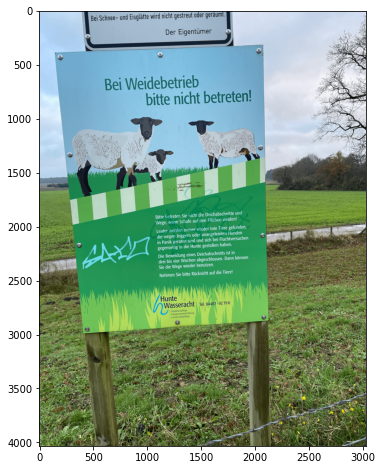

In [ ]:
# Set image
img = cv.imread('/content/drive/My Drive/sheep.png')

# Create a list to store all preprocessed versions
preprocessed_list = {}
# create a list that stores strings describing all preprocessed versions
preprocessed_names_list = {}

# Add the original image to the list
preprocessed_list[0] = cv.cvtColor(img, cv.COLOR_BGR2RGB)
preprocessed_names_list[0] = "RGB"

plt.figure(figsize=(8, 8))
plt.imshow(preprocessed_list[0])

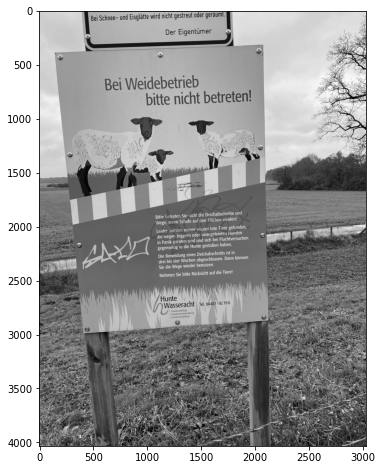

In [ ]:
# Create a greyscale copy
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Output image
fig = plt.figure(figsize=(8,8))
plt.imshow(img_gray, cmap = "gray")

# Add greyscale copy to preprocessed List
img_gray = cv.merge((img_gray,img_gray,img_gray)) # Hack for 3 gray channels
preprocessed_list[1] = img_gray
preprocessed_names_list[1] = "Grayscale"


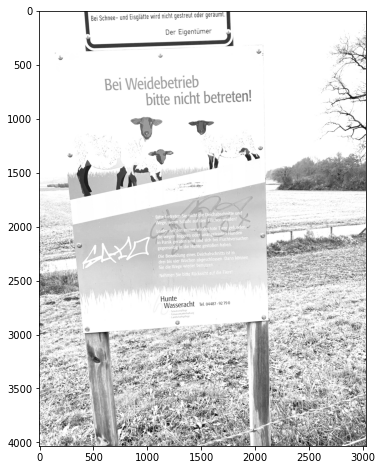

In [ ]:
alpha = 2 # Contrast
beta = 0 # Brightness

# Change contrast (grayscale)
img_gray_highK = cv.convertScaleAbs(img_gray, alpha=alpha, beta=beta)

# Show plot
plt.figure(figsize=(8,8))
plt.imshow(img_gray_highK, cmap='gray')

# Add high contrast greyscale copy to preprocessed list
preprocessed_list[2] = img_gray_highK
preprocessed_names_list[2] = "Grayscale high contrast"

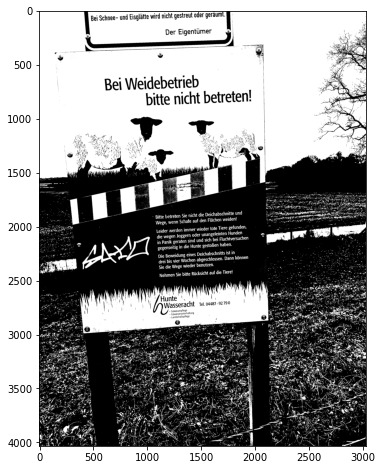

In [ ]:
# Create a binary copy using "smart" thresholding, also apply Gaussian blur for noise reduction
th, img_bin = cv.threshold(cv.cvtColor(img, cv.COLOR_BGR2GRAY),0,255, cv.THRESH_BINARY + cv.THRESH_OTSU)
# Output image
fig = plt.figure(figsize=(8,8))
plt.imshow(img_bin, cmap = "gray")

img_bin = cv.merge((img_bin, img_bin, img_bin)) # Hack for 3 gray channels

# Add binary copy to preprocessed List
preprocessed_list[3] = img_bin
preprocessed_names_list[3] = "Binary with OTSU"

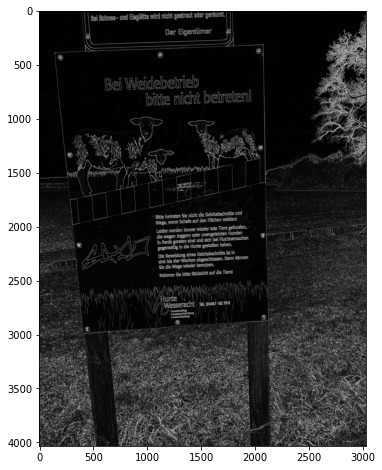

In [ ]:
# Apply edge-detection using sobel filter on the grayscale picture
scale = 1
delta = 0
ddepth = cv.CV_16S
# Reduce noise using gaussian blur
src = cv.GaussianBlur(img, (3, 3), 0)
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
# gradient in x direction
grad_x = cv.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
# gradient in direction 
grad_y = cv.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    
abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)
    
grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

grad = cv.merge((grad, grad, grad)) # Hack for 3 gray channels

preprocessed_list[4] = grad
preprocessed_names_list[4] = "Sobel + Gauss"

fig = plt.figure(figsize=(8,8))
plt.imshow(grad, cmap = "gray")


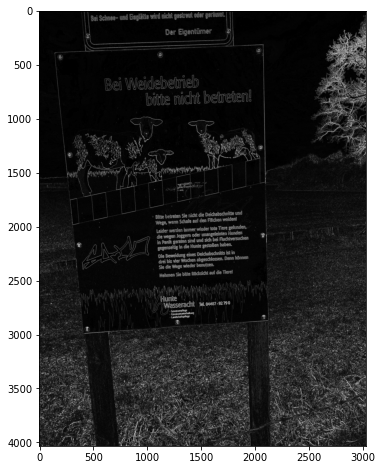

In [ ]:
# Apply edge-detection using laplacian filter on grayscale picture
# source : https://docs.opencv.org/3.4/d5/db5/tutorial_laplace_operator.html

ddepth = cv.CV_16S
kernel_size = 3
# the original bgr-picture was already blurred and converted to grayscale for edge-detection with sobel  
# we can now apply the laplace function to this picture
dst = cv.Laplacian(gray, ddepth, ksize = kernel_size)
dst = cv.convertScaleAbs(dst)

dst = cv.merge((dst, dst, dst)) # hack for 3 gray channels

preprocessed_list[5] = dst
preprocessed_names_list[5] = "Laplace + Gauss"

fig = plt.figure(figsize=(8,8))
plt.imshow(dst, cmap = "gray")

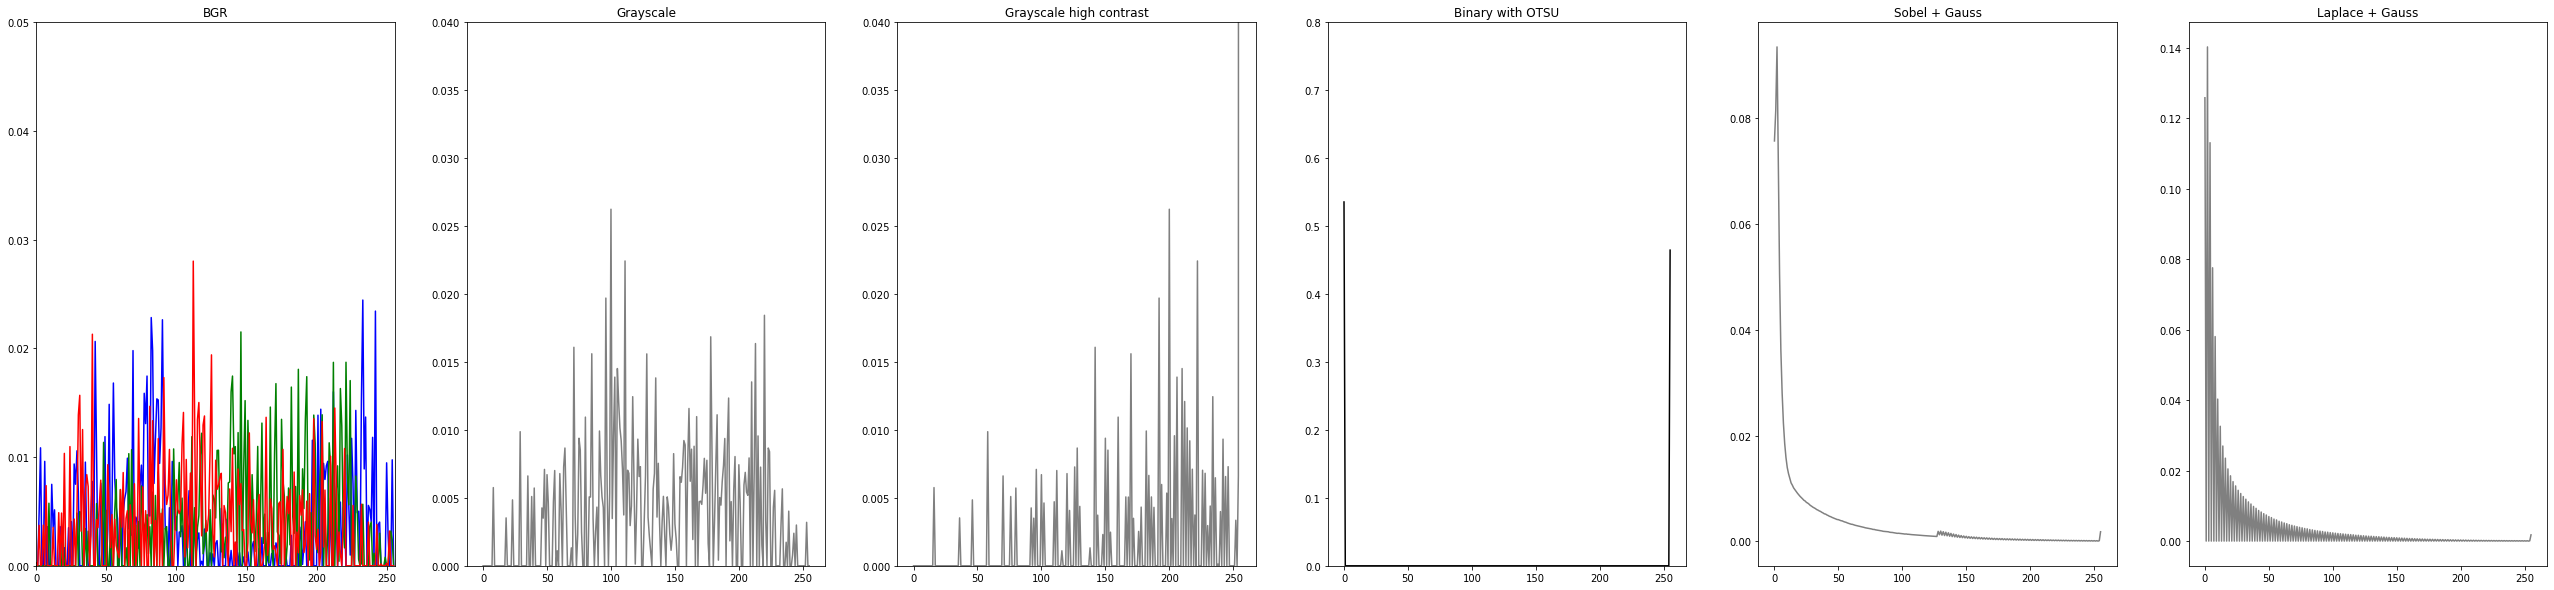

In [ ]:
# Plot histograms for the pictures in the processing list
# source: https://docs.opencv.org/3.4/d8/dbc/tutorial_histogram_calculation.html
histsize = 256
histrange = [0, histsize]

fig = plt.figure(figsize=(45, 10)) 
# Histogram for BGR
ax1 = fig.add_subplot(1, len(preprocessed_list), 1)
ax1.title.set_text('BGR')
bgr_planes = cv.split(img)

hist_b = cv.calcHist([bgr_planes[0]],[0],None,[histsize],histrange)
hist_b = hist_b / hist_b.sum()
hist_g = cv.calcHist([bgr_planes[1]],[0],None,[histsize],histrange)
hist_g = hist_g / hist_g.sum()
hist_r = cv.calcHist([bgr_planes[2]],[0],None,[histsize],histrange)
hist_r = hist_r / hist_r.sum()
plt.xlim([0, 256])
plt.ylim([0,0.05])
plt.plot(hist_b,'b')
plt.plot(hist_g,'g')
plt.plot(hist_r,'r')

# histogram for grayscale
ax2 = fig.add_subplot(1, len(preprocessed_list), 2)
hist_gray = cv.calcHist([img_gray],[0],None,[histsize],histrange)
hist_gray = hist_gray / hist_gray.sum()
ax2.title.set_text(preprocessed_names_list[1])
plt.ylim([0,0.04])
plt.plot(hist_gray,'gray')

# histogram for grayscale high contrast
ax3 = fig.add_subplot(1, len(preprocessed_list), 3)
hist_gray_hc = cv.calcHist([img_gray_highK],[0],None,[histsize],histrange)
hist_gray_hc  = hist_gray_hc / hist_gray_hc.sum()
ax3.title.set_text(preprocessed_names_list[2])
plt.ylim([0,0.04])
plt.plot(hist_gray_hc,'gray')

# histogram for binary
ax4 = fig.add_subplot(1, len(preprocessed_list), 4)
hist_bin = cv.calcHist([img_bin],[0],None,[histsize],histrange)
hist_bin = hist_bin / hist_bin.sum()
ax4.title.set_text(preprocessed_names_list[3])
plt.ylim([0,0.8])
plt.plot(hist_bin,'black') 

# histogram for sobel
ax5 = fig.add_subplot(1, len(preprocessed_list), 5)
hist_grad = cv.calcHist([grad],[0],None,[histsize],histrange)
hist_grad = hist_grad / hist_grad.sum()
ax5.title.set_text(preprocessed_names_list[4])
plt.plot(hist_grad, 'gray')

# histogram for laplace
ax6 = fig.add_subplot(1, len(preprocessed_list), 6)
hist_dst = cv.calcHist([dst],[0],None,[histsize],histrange)
hist_dst = hist_dst / hist_dst.sum()
ax6.title.set_text(preprocessed_names_list[5])
plt.plot(hist_dst, 'gray')

**Problem:** For further accurate OCR usage we need to make sure that the text in the image is parallel to the horizon. The best solution we found to automatically correct image rotation is the Radon transform approach. 
Here another problem arises however, this approach requires that only the box containing text is present in the image.

To solve this we can either use edge detection to crop the image to only contain the part with text, this works if we assume that there is a clearly detectable box containing the image.

The simplest solution is however to require the user to crop the image to only contain the relevant part.

/usr/local/lib/python3.7/dist-packages/skimage/transform/radon_transform.py:83: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


Rotation: -2.00 degrees


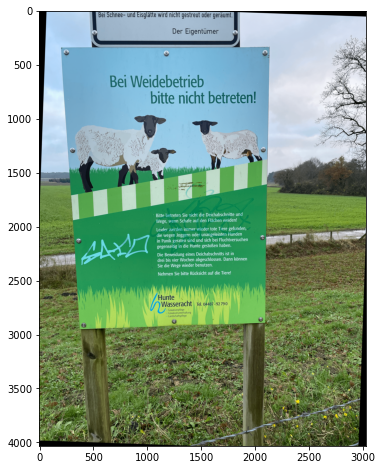

In [ ]:
# Cell for deskewing the image using Radon Transformation
# Source: https://stackoverflow.com/questions/46084476/radon-transformation-in-python/55454222
from skimage.transform import radon

# EAST is too unreliable at finding only the correct text boxes, so this approach 
# of cropping the image is not feasible

# def find_textbox(rect_list):
#   left = rect_list[0][0][0]
#   top =  rect_list[0][0][1]
#   right = rect_list[0][0][2]
#   bottom = rect_list[0][0][3]

#   for elem in sorted_boxes:
#     for (startX, startY, endX, endY) in elem:
#       if startX < left:
#         left = startX
#       if startY < top:
#         top = startY
#       if endX > right:
#         right = endX
#       if endY > bottom:
#         bottom = endY
#   return left, top, right, bottom
# left, top, right, bottom = find_textbox(sorted_boxes)

# Here we REQUIRE the image to be cropped to in the best case ONLY contain the
# text that needs to be rotated
radon_preprocess = img.copy()
I = cv.cvtColor(radon_preprocess, cv.COLOR_BGR2GRAY)
h, w = I.shape
I = I[0:3000, 400:2200] #<- For testin only, manual cropping of image
# If the resolution is high, resize the image to reduce processing time.
if (w > 640):
    I = cv.resize(I, (640, int((h / w) * 640)))
I = I - np.mean(I)  # Demean; make the brightness extend above and below zero

# Do the radon transform
sinogram = radon(I)
# Find the RMS value of each row and find "busiest" rotation,
# where the transform is lined up perfectly with the alternating dark
# text and white lines
r = np.array([np.sqrt(np.mean(np.abs(line) ** 2)) for line in sinogram.transpose()])
rotation = np.argmax(r)
print('Rotation: {:.2f} degrees'.format(90 - rotation))

# Rotate and save with the original resolution
M = cv.getRotationMatrix2D((w/2, h/2), 90 - rotation, 1)

# List containing preprocessed and rotated images
preprocessed_list_rotated = []

for idx, image in enumerate(preprocessed_list):
  preprocessed_list_rotated.append(cv.warpAffine(preprocessed_list[idx], M, (w, h)))
  preprocessed_list[idx] = preprocessed_list_rotated[idx]

fig = plt.figure(figsize=(8,8))
plt.imshow(preprocessed_list_rotated[0])

[INFO] Initializing text detection with EAST [1/6]
[INFO] text detection took 4.904505 seconds
[INFO] Initializing text detection with EAST [2/6]
[INFO] text detection took 0.854857 seconds
[INFO] Initializing text detection with EAST [3/6]
[INFO] text detection took 0.748268 seconds
[INFO] Initializing text detection with EAST [4/6]
[INFO] text detection took 0.628546 seconds
[INFO] Initializing text detection with EAST [5/6]
[INFO] text detection took 0.660510 seconds
[INFO] Initializing text detection with EAST [6/6]
[INFO] text detection took 0.645723 seconds


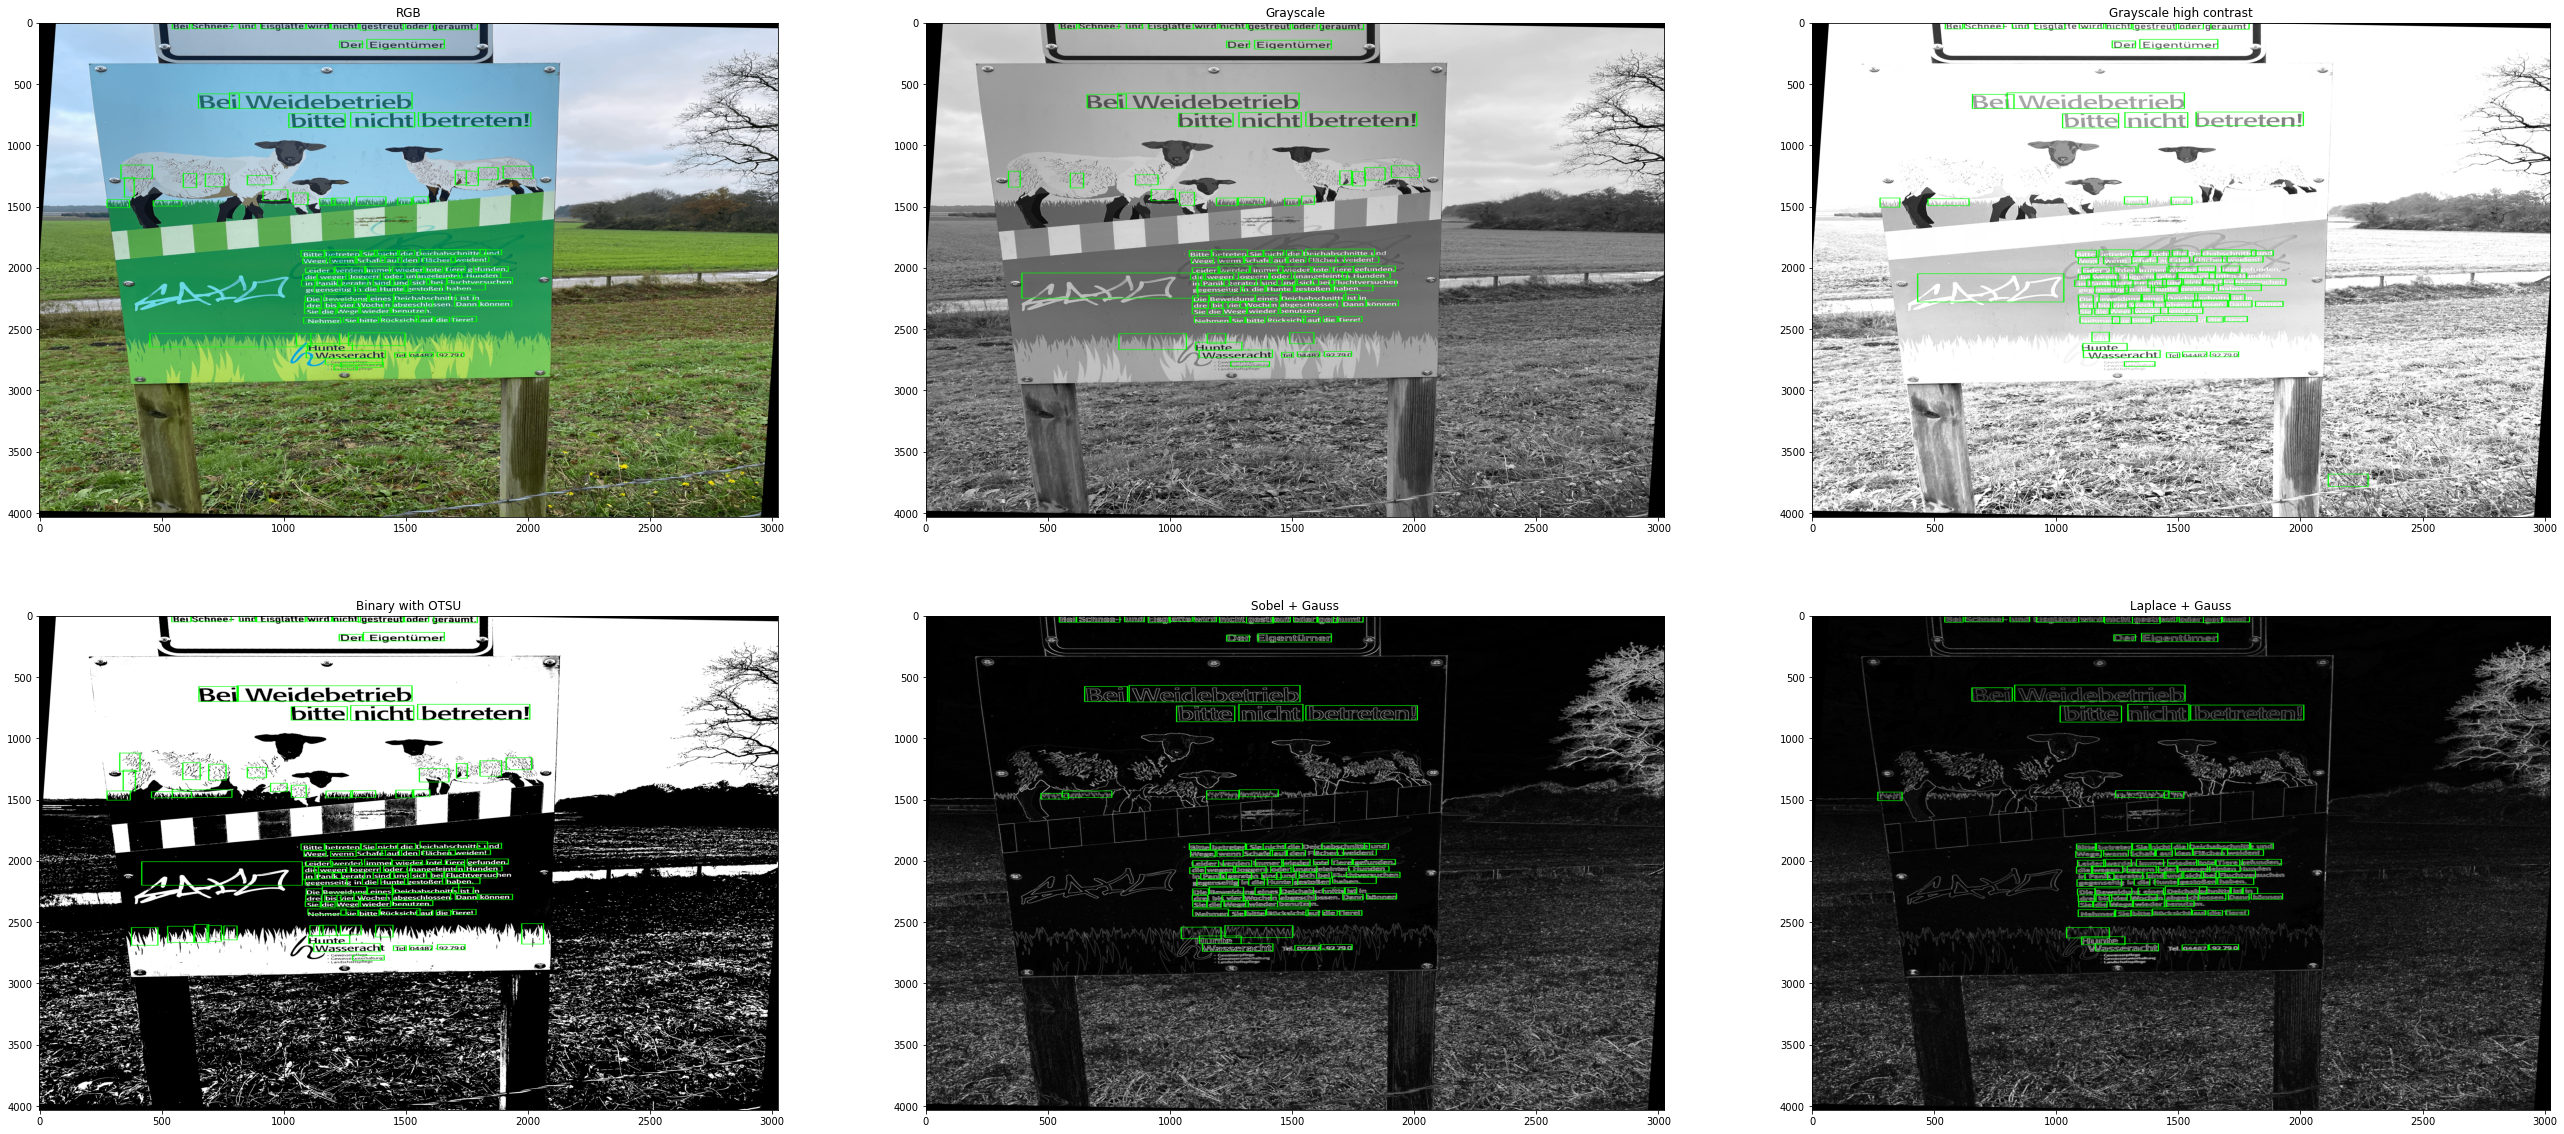

In [ ]:
# Use EAST 
# Source: https://www.pyimagesearch.com/2018/08/20/opencv-text-detection-east-text-detector/
from imutils.object_detection import non_max_suppression
import time

# Create list that will contain cordinates of found text boxes for each image
boxes_list = []

# Set min confidence for text detection
min_score = 0.99 # Adjustable

# Set scaling resolution, must be multiple of 32 for EAST
res = 1280 # 1280x1280 works good

# Figure containing output images
fig = plt.figure(figsize=(45,20))


for index, img_idx in enumerate(preprocessed_list):
	# Create copy and grab image dimensions
	orig = preprocessed_list[img_idx].copy()
	orig_rectangles = preprocessed_list[img_idx].copy()
	(H, W) = orig.shape[:2]

	# Adjust image dimensions
	(newW, newH) = (res, res)
	rW = W / float(newW)
	rH = H / float(newH)

	preprocessed_img = cv.resize(preprocessed_list[img_idx], (newW, newH))
	(H, W) = preprocessed_img.shape[:2]

	# 2 layers are needed, the confiidences of the predictions and koordinates of found Text
	layerNames = [
		"feature_fusion/Conv_7/Sigmoid",
		"feature_fusion/concat_3"]

	# Load EAST
	print("[INFO] Initializing text detection with EAST [" + str(index + 1) + "/" + str(len(preprocessed_list)) + "]")
	net = cv.dnn.readNet('/content/drive/My Drive/east/frozen_east_text_detection.pb')
	net.setPreferableBackend(cv.dnn.DNN_BACKEND_CUDA)
	net.setPreferableTarget(cv.dnn.DNN_TARGET_CUDA)

	# Create a "blob" and generate output using the trained model
	blob = cv.dnn.blobFromImage(preprocessed_img, 1.0, (W, H),(123.68, 116.78, 103.94), swapRB=True, crop=False)
	start = time.time()
	net.setInput(blob)
	(scores, geometry) = net.forward(layerNames)
	end = time.time()

	print("[INFO] text detection took {:.6f} seconds".format(end - start))
 
	# Grab the number of rows and columns from the scores volume, then
	# initialize our set of bounding box rectangles and corresponding
	# confidence scores
	(numRows, numCols) = scores.shape[2:4]
	rects = []
	confidences = []

	# Iterate the rows
	for y in range(0, numRows):
		# Extract the scores alongside the cordinates of found text
		scoresData = scores[0, 0, y]
		xData0 = geometry[0, 0, y]
		xData1 = geometry[0, 1, y]
		xData2 = geometry[0, 2, y]
		xData3 = geometry[0, 3, y]
		anglesData = geometry[0, 4, y]

		# Iterate columns
		for x in range(0, numCols):
			# Ignore scores below the threshold
			if scoresData[x] < min_score:
				continue
			# Calculate offset factor as our resulting feature maps will
			# be 4x smaller than the input image
			(offsetX, offsetY) = (x * 4.0, y * 4.0)
			# Calculate rotation angle
			angle = anglesData[x]
			cos = np.cos(angle)
			sin = np.sin(angle)
			# Calculate width and height of the bounding box
			h = xData0[x] + xData2[x]
			w = xData1[x] + xData3[x]
			# Caclulate cordinates of the bounding box
			endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
			endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
			startX = int(endX - w)
			startY = int(endY - h)
			# Add the bounding box coordinates and probability score to
			# our respective lists
			rects.append((startX, startY, endX, endY))
			confidences.append(scoresData[x])
		
	# Apply non-maxima suppression to suppress weak, overlapping bounding boxes
	boxes = non_max_suppression(np.array(rects), probs=confidences)

	# Iterate all boxes of an image
	for (startX, startY, endX, endY) in boxes:
		# Rescale the boxes
		startX = int(startX * rW)
		startY = int(startY * rH)
		endX = int(endX * rW)
		endY = int(endY * rH)
		# Draw boxes in output image
		cv.rectangle(orig_rectangles, (startX, startY), (endX, endY), (0, 255, 0), 3)

	# Add boxes to list containing all boxes for an image
	boxes_list.append(boxes)

	# Add output image to plot
	fig.add_subplot(2, 3, index+1).title.set_text(preprocessed_names_list[index])
	plt.imshow(orig_rectangles, cmap='gray', aspect='auto')

# Display plot
plt.show()

[[[230, 1, 263, 18], [264, 0, 333, 16], [347, 3, 375, 17], [377, 1, 461, 18], [464, 1, 507, 17], [509, 1, 557, 17], [553, 1, 631, 19], [633, 2, 675, 18], [684, 2, 759, 20]], [[520, 50, 560, 67], [562, 45, 702, 67]], [[277, 185, 345, 224], [343, 183, 646, 223]], [[437, 237, 534, 272], [540, 234, 649, 273], [656, 231, 850, 270]], [[140, 357, 175, 404], [764, 377, 801, 417], [809, 369, 853, 400]], [[146, 401, 167, 455], [249, 382, 279, 426], [294, 386, 324, 427], [361, 394, 394, 421], [659, 397, 710, 432], [723, 384, 742, 422]], [[401, 435, 430, 457], [437, 440, 463, 472]], [[118, 455, 158, 479], [195, 457, 264, 473], [231, 452, 334, 472], [497, 455, 543, 473], [540, 454, 583, 472], [618, 453, 649, 473], [647, 452, 677, 470]], [[454, 592, 495, 608], [494, 591, 558, 606], [557, 592, 584, 606], [584, 591, 621, 604], [621, 591, 652, 605], [660, 586, 777, 603], [759, 590, 801, 604]], [[459, 610, 497, 625], [505, 611, 549, 625], [549, 608, 600, 622], [594, 608, 628, 622], [624, 608, 659, 622],

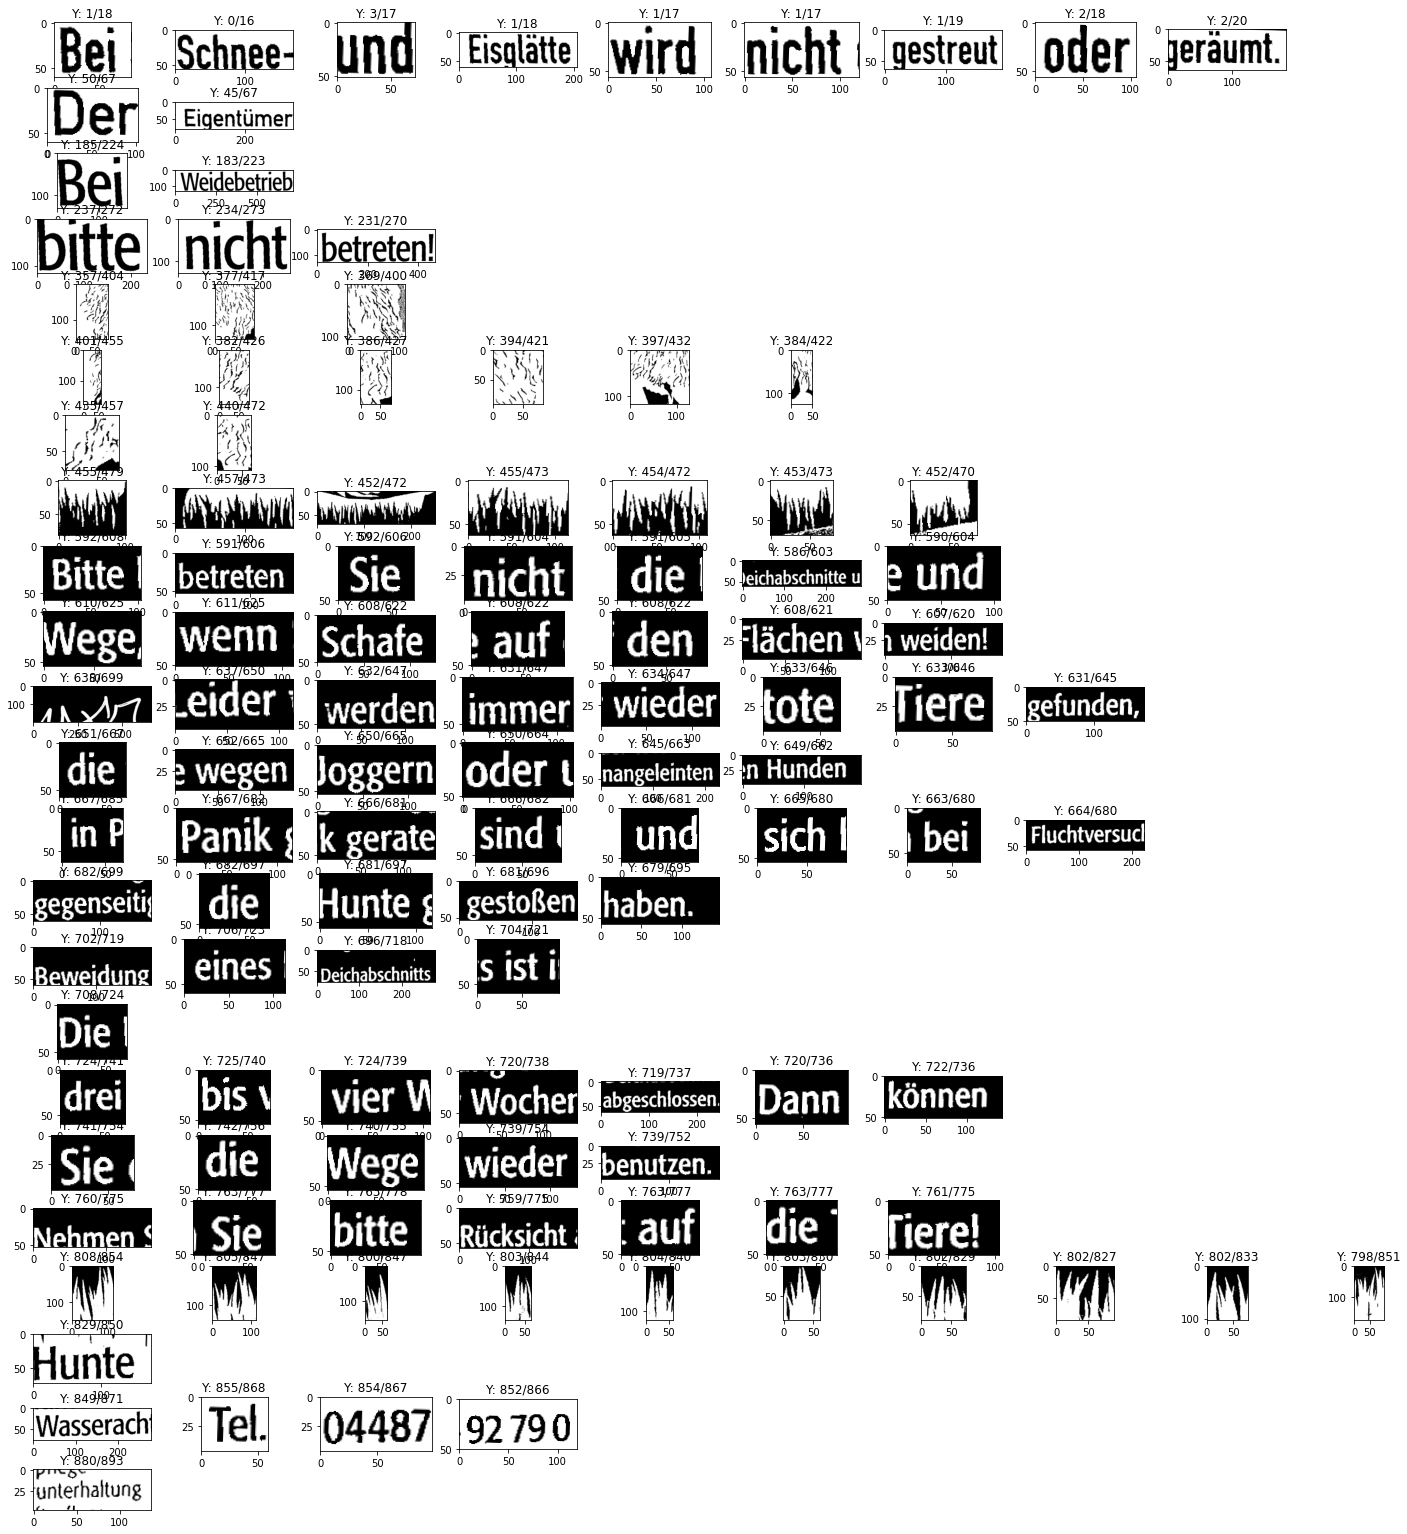

In [ ]:
img_index = 3 # Set index of image used for text position detection
margin = 7 # To account for inaccuracy set amount to increase each boundary by

# Create figure that will contain all cropped text areas (boxes)
fig = plt.figure(figsize=(25, 60))

# Method for getting the center of a bounding box
def get_center(box):
  center_x = (box[0] + box[2]) / 2
  center_y = (box[1] + box[3]) / 2
  return int(center_x), int(center_y)

# Check if any text was found before proceeding
if len(boxes_list[img_index]) == 0:
  raise SystemExit("List is empty")

# Sort each boxes array
def sort_boxes(to_sort):
  sorted_boxes_tmp = []

  to_sort = sorted(to_sort, key=lambda k: [k[1], k[0]])

  row = []

  # Find all words within the same line and append them into a list
  while(len(to_sort) > 0):

    for rect in to_sort:
      if len(to_sort) > 0:

        y_new = get_center(to_sort[0])[1]
        y_range = range(rect[1], rect[3])

        if y_new in y_range:
          row.append(rect)
    
    to_sort = [i for i in to_sort if i not in row] 

    to_sort = sorted(to_sort, key=lambda k: [k[1], k[0]])
    row = sorted(row, key=lambda k: [k[0], k[1]])
    sorted_boxes_tmp.append(row)
    row = []

  return sorted_boxes_tmp

sorted_boxes = sort_boxes(boxes_list[img_index].tolist())

# Crop all found boxes and plot them
for index, elem in enumerate(sorted_boxes):
  for index2, (startX, startY, endX, endY)  in enumerate(elem):
    cropped_img = preprocessed_list[img_index]
    
    # Calculate extended margins, respect image bounds
    y_start =  int(startY * rH - margin) if int(startY * rH - margin) >= cropped_img.shape[1] else int(startY * rH)
    y_end = int(endY * rH + margin) if int(endY * rH + margin) <= cropped_img.shape[1] else int(endY * rH + margin)
    x_start = int(startX * rW - margin) if int(startX * rW - margin) >= cropped_img.shape[0] else int(startX * rW)
    x_end = int(endX * rW + margin) if int(endX * rW + margin) <= cropped_img.shape[0] else int(endX * rW)

    cropped_img = cropped_img[y_start:y_end, x_start:x_end]
    ax = fig.add_subplot(50, 10, index2+1+index*10)
    ax.title.set_text('Y: ' + str(startY) + '/' + str(endY))

    plt.imshow(cropped_img)


# Show cropped text 
plt.show()

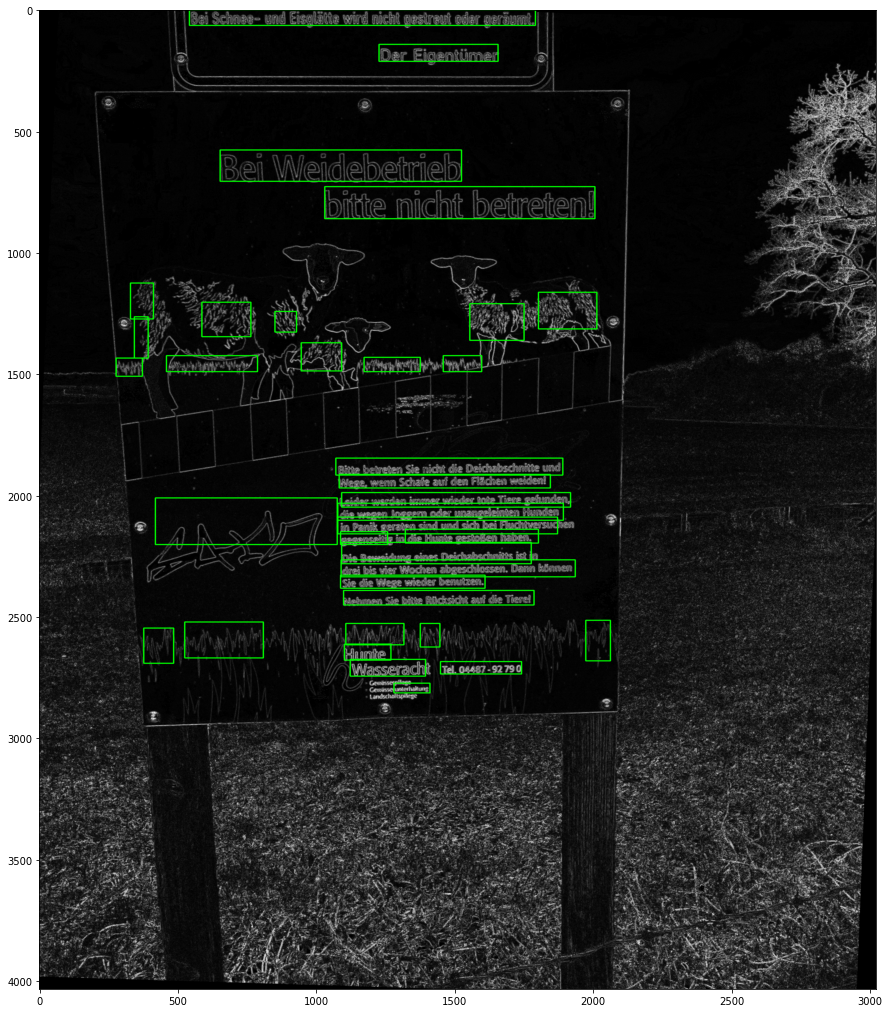

In [ ]:
#Cell for getting connected text boxes

connect_range = 16 # Max distance between boxes that will be connected, must be multiple of 2
height_correction = 20

fig = plt.figure(figsize=(15, 18))

# Method for checking whether a point is in a bounding box
def check_x_intersection(point, range):
  i = 0
  while i <= connect_range:
    if point+i in range:
      return True
    i = i + 2
  return False

# Method for calculating the coordinates of a point on the right side of a bounding box
def get_reach(box):
  return int(box[2]), int((box[1] + box[3]) / 2)

# List containing connected boxes
connected_boxes = []

rect_list = boxes_list[img_index].tolist()
rect_list = sorted(rect_list, key=lambda k: [k[0], k[1]])

loop_idx = 0

# Check whether a bounding box has a close neighbor to it's right, in that case both are 'connected'
while(len(rect_list) > 0):

  curr_rect = rect_list[0]
  rect_reach = get_reach(curr_rect)

  curr_x1 = curr_rect[0]
  curr_x2 = curr_rect[2]
  curr_y1 = curr_rect[1]
  curr_y2 = curr_rect[3]

  boxes_to_remove = [curr_rect]

  for rect in rect_list:
    if check_x_intersection(rect_reach[0], range(rect[0], rect[2])) and rect_reach[1] in range(rect[1], rect[3]) and curr_y2-curr_y1-height_correction <= rect[3]-rect[1]:
      curr_x2 = rect[2]
      
      if rect[1] < curr_y1:
        curr_y1 = rect[1]
      
      if rect[3] > curr_y2:
        curr_y2 = rect[3]
      
      rect_reach = get_reach(rect)
      boxes_to_remove.append(rect)

  connected_boxes.append([curr_x1, curr_y1, curr_x2, curr_y2])
  rect_list = [i for i in rect_list if i not in boxes_to_remove] 

# Draw the expanded boxes on this image
orig_connected_rectangles = preprocessed_list[img_idx].copy()

# Iterate all boxes of an image
for (startX, startY, endX, endY) in connected_boxes:
  # Rescale the boxes
  startX = int(startX * rW)
  startY = int(startY * rH)
  endX = int(endX * rW)
  endY = int(endY * rH)
  # Draw boxes in output image
  cv.rectangle(orig_connected_rectangles, (startX, startY), (endX, endY), (0, 255, 0), 3)

# Sort the boxes
connected_boxes = sort_boxes(connected_boxes)

plt.imshow(orig_connected_rectangles, cmap='gray', aspect='auto')

In [ ]:
# Install English and German tesseract
!sudo apt install tesseract-ocr tesseract-ocr-deu 
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-deu tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 37 not upgraded.
Need to get 5,539 kB of archives.
After this operation, 17.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-deu all 4.00~git24-0e00fe6-1.2 [744 kB]
Fetched 5,539 kB in 1s (4,159 kB/s)
debconf: unable to initialize f

**Text:**
Bei Schnee und Eisglätte wird nicht gestreut oder geräumt. 
   Der Eigentümer
Bei Weidebetrieb bitte nicht betreten
Bitte betreten Sie nicht die Deichabschnitte und Wege, wenn Schafe auf den Flächen weiden!
Leider werden immer wieder tote Tiere gefunden, die wegen Joggern oder unangeleinten Hunden in Panik geraten und sich bei Fluchtversuchen gegenseitig in die Hunte gestoßen haben. 
Die Beweidung eines Deichabschnittes ist in drei bis vier Wochen abgeschlossen. Dann können Sie die Wege wieder benutzen.
Nehmen Sie bitte Rücksicht auf die Tiere!
Hunte Wasserwacht Tel: 04487-92 79 0
Gewässerpflege Gewässerunterhaltung Landschaftspflege


Problem: Tesseract benötigt schwarzes Text auf klaren, weißen Hintergrund


Lösung: Erstelen von ein Binärbild und evtl. Inversion von Schwarz und Weiß.

In [ ]:
# Source for Tesseract config and usage: https://jaafarbenabderrazak-info.medium.com/opencv-east-model-and-tesseract-for-detection-and-recognition-of-text-in-natural-scene-1fa48335c4d1
# Recognize text using tesseract in psm8 mode
import pytesseract

tes_preprocess = preprocessed_list_rotated[0].copy()

# Parameters
scale_percent = 100 # percent of original size
blur_amount = 3 # how much blur to apply
bordersize = 10 # size of border to add

# Method for preprocessing the image for Tesseract usage
def preprocess_tsrct(imge):
  width = int(imge.shape[1] * scale_percent / 100)
  height = int(imge.shape[0] * scale_percent / 100)
  dim = (width, height)
    
  # Resize image
  resized = cv.resize(imge, dim, interpolation = cv.INTER_AREA)
  gray = cv.cvtColor(resized, cv.COLOR_BGR2GRAY)
  processed = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)[1]

  # Make sure that black text is on white background
  w_pix_num = np.sum(processed == 255)
  b_pix_num = np.sum(processed == 0)
  if b_pix_num > w_pix_num:
    processed = cv.bitwise_not(processed)
  
  # Smoothen the background to reduce noise, median blur seems to perform better
  # processed = cv.GaussianBlur(processed, (blur_amount,blur_amount), 0)
  processed = cv.medianBlur(processed,blur_amount)

  # Add white border to image
  processed = cv.copyMakeBorder(
    processed,
    top=bordersize,
    bottom=bordersize,
    left=bordersize,
    right=bordersize,
    borderType=cv.BORDER_CONSTANT,
    value=[255.0, 255.0, 255.0]) 

  return processed

results = []
found_text_psm8 = ""

for index, elem in enumerate(sorted_boxes):
  curr_row = ""
  for index2, (startX, startY, endX, endY) in enumerate(elem):
    
    # Calculate extended margins, respect image bounds  
    y_start =  int(startY * rH - margin) if int(startY * rH - margin) >= tes_preprocess.shape[1] else int(startY * rH)
    y_end = int(endY * rH + margin) if int(endY * rH + margin) <= tes_preprocess.shape[1] else int(endY * rH + margin)
    x_start = int(startX * rW - margin) if int(startX * rW - margin) >= tes_preprocess.shape[0] else int(startX * rW)
    x_end = int(endX * rW + margin) if int(endX * rW + margin) <= tes_preprocess.shape[0] else int(endX * rW)

    cropped_img = tes_preprocess[y_start:y_end, x_start:x_end]
    cropped_img = preprocess_tsrct(cropped_img)

    # Configuration setting for converting image to string   <<- Check other CONFIG
    configuration = ("-l deu+eng --oem 1 --psm 8")  

    # This will recognize the text from the image of the bounding box
    d = pytesseract.image_to_data(cropped_img, output_type=pytesseract.Output.DICT, config=configuration)
    # print(d['text'], d['conf'])
    # Get the highest confidence among the recognized words
    conf_list = [int(x) for x in d['conf']]

    longest_word = max(d['text'], key=len)
    
    max_conf = max(conf_list)
    conf_index = conf_list.index(max_conf)
    
    word_index = d['text'].index(longest_word)
    word_conf = conf_list[word_index]

    text = "" 

    # Filter text with too low detection confidences
    if word_conf >= 40 and len(longest_word) > 1:
      text = text + " " + longest_word
    elif max:
      if max_conf >= 80:
        text = text + " " + d['text'][conf_index]

    # Append detected text to current line of text and clear unwanted symbols
    curr_row = curr_row + " " + text
    curr_row = curr_row.replace("|","")
    curr_row = curr_row.replace("ı","")

  # Append line to the list of detected lines
  found_text_psm8 += curr_row + '\n'
  results.append(curr_row.rstrip())

for line in results:
  print(line + '\n')

In [ ]:
# Cell for text extraction using tesseract in psm7 mode
tes_preprocess = preprocessed_list_rotated[0].copy()

results = []
found_text_psm7 = ""

for index, elem in enumerate(connected_boxes):
  curr_row = ""
  for index2, (startX, startY, endX, endY) in enumerate(elem):
    
    # Calculate adjusted margins 
    y_start = int(startY * rH)
    y_end = int(endY * rH)
    x_start = int(startX * rW)
    x_end = int(endX * rW)

    cropped_img = tes_preprocess[y_start:y_end, x_start:x_end]
    cropped_img = preprocess_tsrct(cropped_img)

    # Configuration setting for converting image to string
    configuration = ("-l deu+eng --oem 1 --psm 7")  

    # This will recognize the text from the image of the bounding box
    d = pytesseract.image_to_data(cropped_img, output_type=pytesseract.Output.DICT, config=configuration)

    text = ""

    for index3, word in enumerate(d['text']):
      if int(d['conf'][index3]) >= 50:
        text = text + word + " "

    # Append detected text to current line of text and clear unwanted symbols
    text = text.replace("|","")
    text = text.replace("ı","")

  # Append line to the list of detected lines
  found_text_psm7 += text + '\n'
  results.append(text.rstrip())

for line in results:
  print(line + '\n')

Bei Schnee- und Eisglätte wird nicht gestreut oder geräumt.

Der Eiaentümer

Bei Weidebetrieb

bitte ncht betreten!









Bitte betreten Sie nicht die Deichabschnitte und

Wege, wenn Schafe auf den Flächen weiden!

„eider werden immer wieder tote Tiere gefunden,

die wegen Joggern oder unangeleinten Hunden

in Panik geraten sind und sich bei Fluchtversuc

‘die Hunte gestoßen haben.

Die Beweidung eines Deichabschnitt ist

drei bis vier Wochen abgeschlossen. Dann können

Sie die Wege wieder benutzen.

Nehmen Sie bitte Rücksicht auf die Tiere!

m



Tel. 790

“unterhaltung



In [ ]:
# Cell for checking accuracy of detected text
import difflib

# List containing the actual word, line for line
actual = "Bei Schnee und Eisglätte wird nicht gestreut oder geräumt Der Eigentümer Bei Weidebetrieb bitte nicht betreten Bitte betreten Sie nicht die Deichabschnitte und Wege, wenn Schafe auf den Flächen weiden Leider werden immer wieder tote Tiere gefunden, die wegen Joggern oder unangeleinten Hunden in Panik geraten und sich bei Fluchtversuchen gegenseitig in die Hunte gestoßen haben Die Beweidung eines Deichabschnittes ist in drei bis vier Wochen abgeschlossen Dann können Sie die Wege wieder benutzen Nehmen Sie bitte Rücksicht auf die Tiere Hunte Wasserwacht Tel: 04487-92 79 0 Gewässerpflege Gewässerunterhaltung Landschaftspflege"
found = found_text_psm7
# found = text

def compare_words(actual, found):
  return difflib.SequenceMatcher(None, actual, found).ratio()

print("Accuracy: ", compare_words(actual, found))


Accuracy:  0.8112582781456954


In [ ]:
# For comparison, the results of Tesseract without previous EAST-detection
# (Tesseract is given the enitre image here, as opposed to only parts including text)
import re

# Configuration setting for converting image to string   <<- Check other CONFIG
configuration = ("-l deu+eng --oem 1 --psm 1")  
processed_img = preprocess_tsrct(preprocessed_list_rotated[0].copy())

# Preprocess the image before runnning text extraction with Tesseract
found_text_psm1 = pytesseract.image_to_string(processed_img, config = configuration)
print("{}\n".format(found_text_psm1), end = " ")

Bei Schnee- und Eisglätte wird nicht gestreut oder geräumt.
° Der Eigentumer j |

¥

Bei Weidebetrieb
bitte nicht betreten!

   

: Bitte betreten Sie nicht die Deichabschnitte und
Wege, wenn Schafe auf den Flächen weiden!

Leider werden immer wieder tote Tiere gefunden, :
die wegen Joggern oder unangeleinten Hunden

| un / .
in Panik geraten sind und sich bei Fluchtversuchen ® wre we a en

gegenseitig in die Hunte gestoßen haben.
Die Beweidung eines Deichabschnitts ist in

drei bis vier Wochen abgeschlossen. Dann können
Sie die Wege wieder benutzen.

Nehmen Sie bitte Rücksicht auf die Tiere! 2 : _ wo a

| | N
\ he nee N N ‘
Hunte '. en
Wasseracht tel. 04487-92790

21
Gewässerunterhaltung
- Landschaftspflege

 

 